In [2]:
%run _init_.py

C:\Users\m\4차4차\speed\데이터 전처리\_init_.py:26: SyntaxWarning: invalid escape sequence '\W'
  font_path = "c:\Windows\Fonts\malgun.ttf"


pandas: pd 2.2.2
numpy : np 2.1.0
matplotlib : mpl 3.9.2
seaborn : sns 0.13.2
sklearn : skl 1.5.1


In [5]:
# 데이터프레임을 로드합니다. (여기서는 df2를 가정합니다)
df = pd.read_csv('df.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   MSSubClass     1452 non-null   int64  
 2   MSZoning       1452 non-null   int64  
 3   LotArea        1452 non-null   int64  
 4   Street         1452 non-null   int64  
 5   Alley          1452 non-null   int64  
 6   LotShape       1452 non-null   int64  
 7   LandContour    1452 non-null   int64  
 8   Utilities      1452 non-null   int64  
 9   LotConfig      1452 non-null   int64  
 10  LandSlope      1452 non-null   int64  
 11  Neighborhood   1452 non-null   int64  
 12  Condition1     1452 non-null   int64  
 13  Condition2     1452 non-null   int64  
 14  BldgType       1452 non-null   int64  
 15  HouseStyle     1452 non-null   int64  
 16  OverallQual    1452 non-null   int64  
 17  OverallCond    1452 non-null   int64  
 18  YearBuil

c:\Users\m\miniconda3\envs\ml\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\m\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


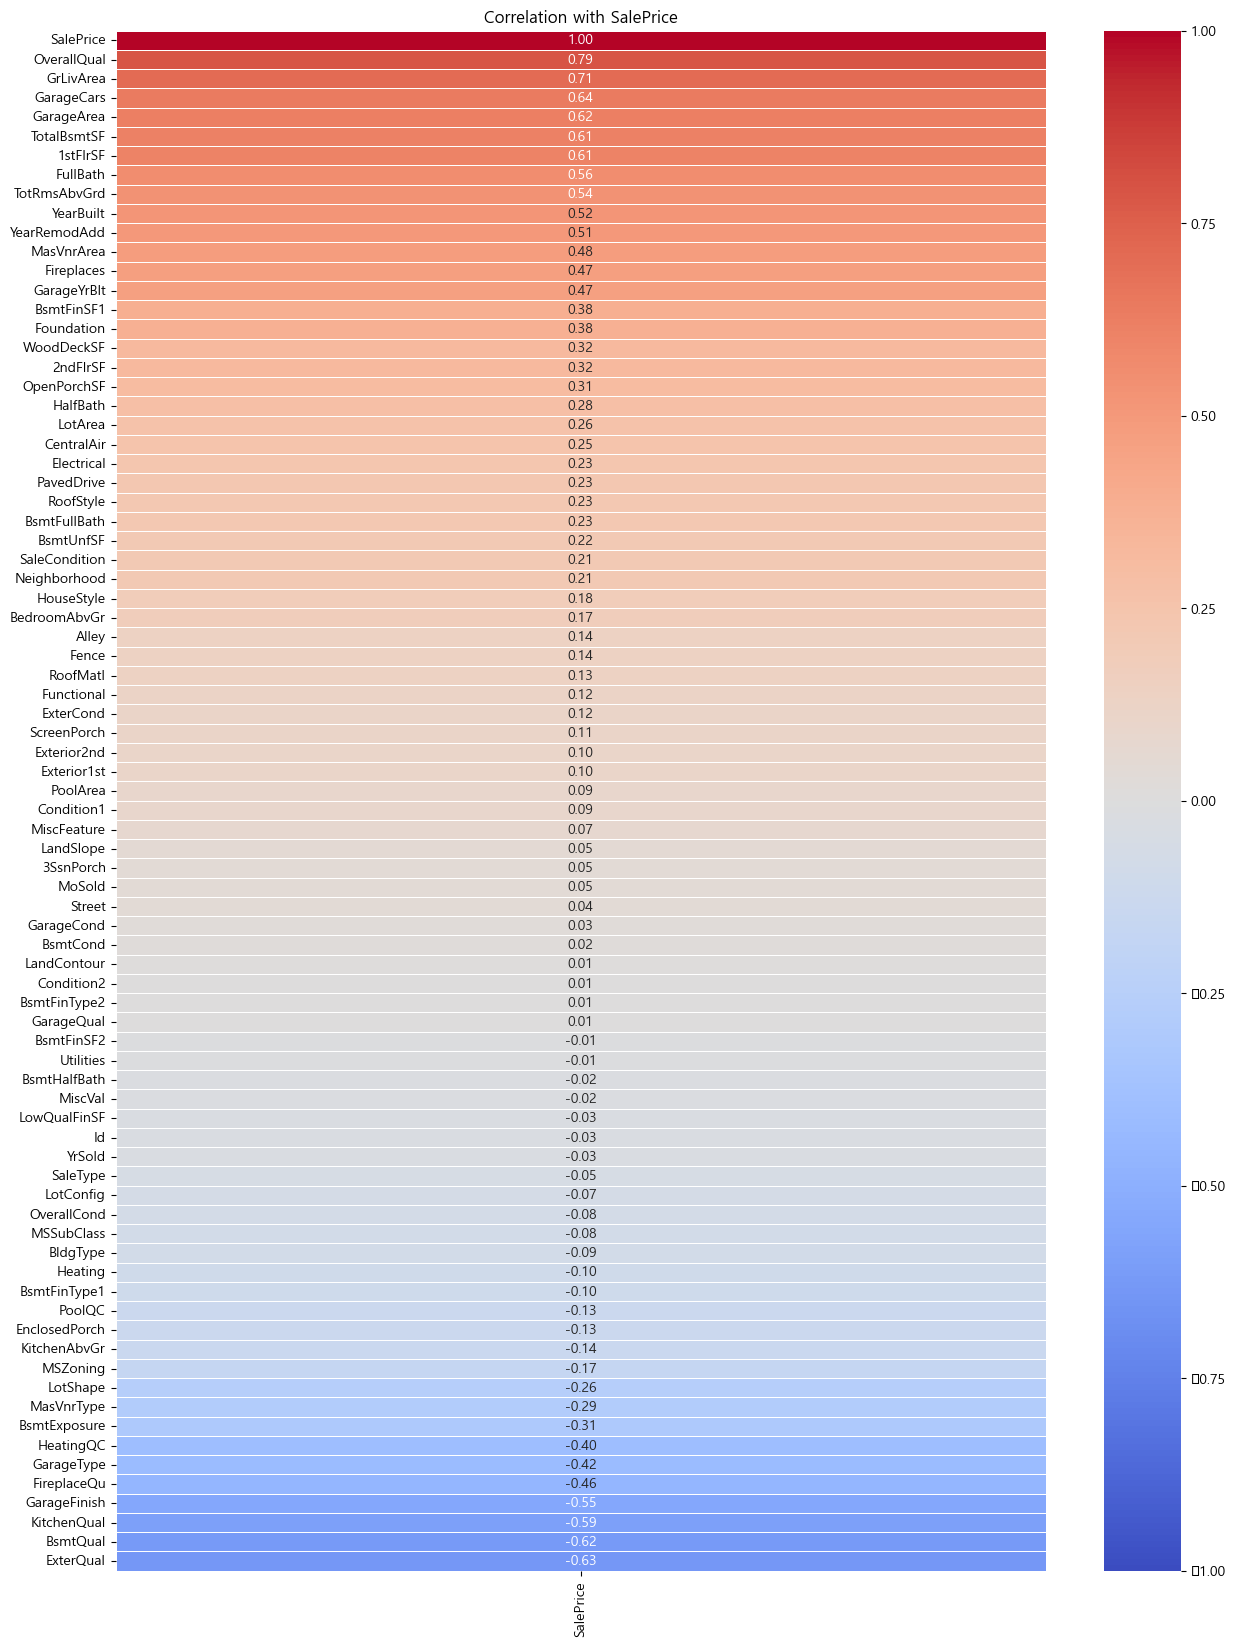

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_with_saleprice(df):
    """
    이 함수는 데이터프레임의 'SalePrice' 열과 다른 열들 간의 상관관계를 계산하고,
    상관계수가 높은 순서대로 시각화한 히트맵을 생성합니다.
    
    Parameters:
    df (pd.DataFrame): 상관관계를 계산할 데이터프레임
    
    Returns:
    None
    """
    # 상관관계 계산
    corr = df.corr()
    
    # 'SalePrice'와의 상관관계만 필터링
    corr_saleprice = corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

    # 전체 상관관계를 보여주기 위해 히트맵의 크기 조정
    plt.figure(figsize=(15, 20))  # 그래프의 크기를 조정하여 모든 상관계수를 표시할 수 있도록 합니다.
    
    # 히트맵 생성
    sns.heatmap(corr_saleprice, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f', linewidths=0.5)
    plt.title('Correlation with SalePrice')
    plt.xticks(rotation=90)  # x축 레이블을 수직으로 회전하여 가독성을 높입니다.
    plt.yticks(rotation=0)   # y축 레이블은 가로로 유지하여 가독성을 높입니다.
    plt.show()

# 함수 호출 예시
plot_correlation_with_saleprice(df)


In [27]:
import pandas as pd

def print_top_bottom_correlations(df):
    """
    이 함수는 데이터프레임의 'SalePrice' 열과 다른 열들 간의 상관관계를 계산하고,
    상관계수가 가장 높은 3개 열과 가장 낮은 3개 열을 출력합니다.
    
    Parameters:
    df (pd.DataFrame): 상관관계를 계산할 데이터프레임
    
    Returns:
    None
    """
    # 상관관계 계산
    corr = df.corr()
    
    # 'SalePrice'와의 상관관계만 필터링
    corr_saleprice = corr[['SalePrice']]
    
    # 상관계수 정렬
    sorted_corr = corr_saleprice.sort_values(by='SalePrice', ascending=False)
    
    # 가장 높은 상관계수 3개
    top_3 = sorted_corr.head(14).index[1:]  # 첫 번째는 'SalePrice' 자기 자신이므로 제외
    
    # 가장 낮은 상관계수 3개
    bottom_3 = sorted_corr.tail(7).index[0:]  # 첫 번째는 'SalePrice' 자기 자신이므로 제외
    
    # 결과 출력
    print("Top 3 features with highest correlation with SalePrice:")
    for feature in top_3:
        print(f"- {feature}")
    
    print("\nBottom 3 features with lowest correlation with SalePrice:")
    for feature in bottom_3:
        print(f"- {feature}")

# 함수 호출 예시
print_top_bottom_correlations(df)


Top 3 features with highest correlation with SalePrice:
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- YearRemodAdd
- MasVnrArea
- Fireplaces
- GarageYrBlt

Bottom 3 features with lowest correlation with SalePrice:
- HeatingQC
- GarageType
- FireplaceQu
- GarageFinish
- KitchenQual
- BsmtQual
- ExterQual


In [11]:
import pandas as pd

def print_significant_correlations_excluding_saleprice(df, threshold=0.3):
    """
    이 함수는 데이터프레임의 'SalePrice' 열과 다른 열들 간의 상관관계를 계산하고,
    상관계수의 절대값이 주어진 임계값(threshold) 이상인 열들을 출력합니다.
    단, 'SalePrice' 열은 출력하지 않습니다.
    
    Parameters:
    df (pd.DataFrame): 상관관계를 계산할 데이터프레임
    threshold (float): 상관계수의 절대값 임계값
    
    Returns:
    None
    """
    # 상관관계 계산
    corr = df.corr()
    
    # 'SalePrice'와의 상관관계만 필터링
    corr_saleprice = corr[['SalePrice']]
    
    # 'SalePrice'를 제외한 열만 필터링
    corr_saleprice_excluding = corr_saleprice.drop('SalePrice')
    
    # 절대값이 threshold 이상인 상관계수 필터링
    significant_corr = corr_saleprice_excluding[abs(corr_saleprice_excluding['SalePrice']) >= threshold]
    
    # 결과 출력
    print(f"Features with absolute correlation >= {threshold} with SalePrice (excluding SalePrice itself):")
    for feature in significant_corr.index:
        print(f"- {feature}: {significant_corr.loc[feature, 'SalePrice']:.4f}")

# 함수 호출 예시
print_significant_correlations_excluding_saleprice(df)


Features with absolute correlation >= 0.3 with SalePrice (excluding SalePrice itself):
- OverallQual: 0.7900
- YearBuilt: 0.5229
- YearRemodAdd: 0.5072
- MasVnrArea: 0.4775
- ExterQual: -0.6336
- Foundation: 0.3818
- BsmtQual: -0.6189
- BsmtExposure: -0.3090
- BsmtFinSF1: 0.3840
- TotalBsmtSF: 0.6130
- HeatingQC: -0.4001
- 1stFlrSF: 0.6068
- 2ndFlrSF: 0.3227
- GrLivArea: 0.7101
- FullBath: 0.5625
- KitchenQual: -0.5866
- TotRmsAbvGrd: 0.5363
- Fireplaces: 0.4689
- FireplaceQu: -0.4594
- GarageType: -0.4152
- GarageYrBlt: 0.4662
- GarageFinish: -0.5489
- GarageCars: 0.6397
- GarageArea: 0.6225
- WoodDeckSF: 0.3247
- OpenPorchSF: 0.3113
